# Simple example of plotting an earthquake source mechanism using SeisSrcInv

This jupyter-notebook provides a simple example of how to plot an earthquake source mechanism using SeisSrcInv's built in plotting functions.

In [1]:
# Import the module:
import SeisSrcInv
import numpy as np
import matplotlib.pyplot as plt

## 1. Load input data for an earthquake, as output from SeisSrcInv:

In [2]:
# Load data:
MT_data_filename = "event_data/20090121042009185230_FW_DC.pkl"
MT_waveforms_data_filename = "event_data/20090121042009185230_FW_DC.wfs"
uid, MTp, MTp_absolute, MTs, stations = SeisSrcInv.plot.load_MT_dict_from_file(MT_data_filename)
wfs_dict = SeisSrcInv.plot.load_MT_waveforms_dict_from_file(MT_waveforms_data_filename)

# Get some info about the data formats
print("-"*50)
print("Shape of MTs is:", MTs.shape)
print("-"*50)
print("Waveforms dictionary keys, wfs_dict.keys(), takes the form", wfs_dict.keys())
print("Each of these is then an array. Must take exact naming format of <station, component>")
print("-"*50)


# help(SeisSrcInv.plot.plot_radiation_pattern_for_given_NED_full_MT) #(ax, radiation_pattern_full_MT, bounding_circle_path, lower_upper_hemi_switch="lower", radiation_MT_phase="P", unconstrained_vs_DC_switch="unconstrained", plot_plane="EN")



--------------------------------------------------
Shape of MTs is: (6, 1000)
--------------------------------------------------
Waveforms dictionary keys, wfs_dict.keys(), takes the form dict_keys(['ST01, Z', 'ST01, R', 'ST01, T', 'ST02, Z', 'ST02, R', 'ST02, T', 'ST03, Z', 'ST03, R', 'ST03, T'])
Each of these is then an array. Must take exact naming format of <station, component>
--------------------------------------------------


In [3]:
# Create the stations data object:
# Note: <stations> takes a very specific format
station_names = ['ST01', 'ST02', 'ST03', 'ST05', 'ST06', 'ST07', 'ST08', 'ST09', 'ST10']
station_azimuths = [288, 209, 174, 228, 65, 66, 51, 80, 68]
station_takeoff_angles = [23, 19, 36, 38, 68, 63, 63, 64, 56]
station_polarities = np.zeros(10) # As do full waveform inversion, don't need polarities.

# And create stations array:
stations = []
for i in range(len(station_names)):
    station = station_names[i]
    azi = station_azimuths[i]
    toa = station_takeoff_angles[i]
    pol = 0 # Assign zero polarity, as not needed for full waveform
    stations.append([np.array([station], dtype=str), np.array([[azi]], dtype=float), np.array([[toa]], dtype=float), np.array([[pol]], dtype=int)])


Max. prob MT to plot: [ -2.69628805e-02  -1.94497588e+02   1.94524550e+02  -3.23858463e+00
   6.52600872e+00   5.54270310e+02]
(Skipping current nodal plane solution as can't plot.)


<ipython-input-4-1b81845a4d2e>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


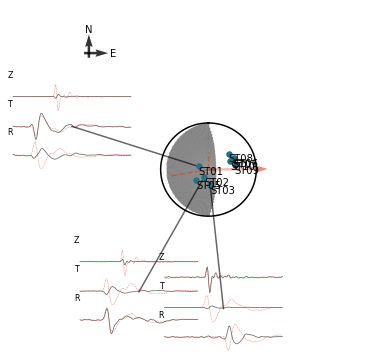

In [4]:
# And run plotting function:

# Get maximum probability solution for plotting radiation pattern for:
radiation_pattern_MT = MTs[:,np.argmax(MTp_absolute)] 
print("Max. prob MT to plot:", radiation_pattern_MT)

# Create figure:
figure_filename = [] # If specified as a string then will save to that path.
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

# And do plotting:
fig, ax = SeisSrcInv.plot.plot_full_waveform_result_beachball(MTs, wfs_dict, fig=fig, ax=ax, radiation_pattern_MT=radiation_pattern_MT, stations=stations, lower_upper_hemi_switch="upper", figure_filename=figure_filename, num_MT_solutions_to_plot=1, inversion_type="DC", radiation_MT_phase="P", plot_plane="EN", plot_uncertainty_switch=True, uncertainty_MTs=MTs, uncertainty_MTp=MTp, plot_wfs_on_focal_mech_switch=True, DC_switch_slip_vector=True)

fig.show()
